In [424]:
import pandas as pd

In [425]:
bitcoin = pd.read_excel('GDAX.BTC-USD_790301_230316.xlsx')
smp500 = pd.read_csv('^spx_d (1).csv')

In [426]:
bitcoin = bitcoin.iloc[:,[2,4,5]]
bitcoin.drop(range(28), inplace=True)
bitcoin.columns = ['Date', 'Open', 'High']
bitcoin

,Date,Open,High
28,20150201,218.67,233.79
29,20150202,228.39,240.10
30,20150203,237.01,243.90
31,20150204,228.77,230.99
32,20150205,227.11,228.90
...,...,...,...
2985,20230312,20619.34,22276.69
2986,20230313,22216.02,24710.00
2987,20230314,24220.00,26553.90
2988,20230315,24761.61,25300.00


In [427]:
smp500 = smp500.iloc[:, [0,1,2]]
smp500.iloc[36839:38903]

,Date,Open,High
36839,2015-01-02,2058.90,2072.36
36840,2015-01-05,2054.44,2054.44
36841,2015-01-06,2022.15,2030.25
36842,2015-01-07,2005.55,2029.61
36843,2015-01-08,2030.61,2064.08
...,...,...,...
38898,2023-03-09,3998.66,4017.81
38899,2023-03-10,3912.77,3934.05
38900,2023-03-13,3835.12,3905.05
38901,2023-03-14,3894.01,3937.29


<AxesSubplot: >

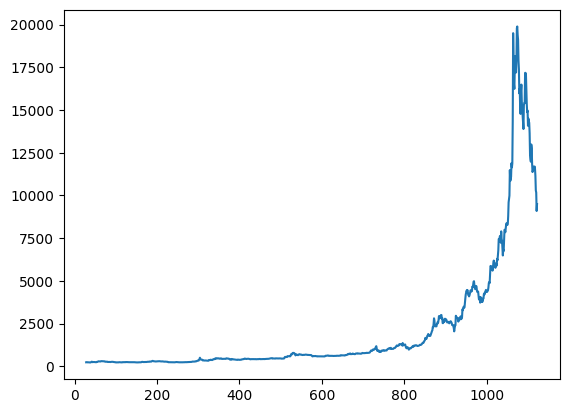

In [428]:
bitcoin.iloc[0:365*3]['High'].plot()

<AxesSubplot: >

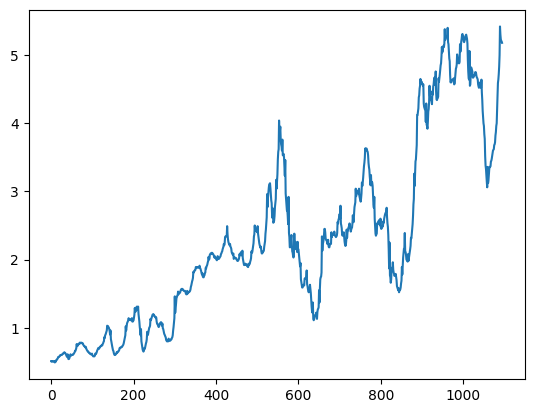

In [429]:
smp500.iloc[0:365*3]['High'].plot()

In [430]:
bitcoin['Date']=bitcoin['Date'].map(lambda x:str(x)[0:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8]) 
bitcoin['Date']

bitcoin['Date'] =pd.to_datetime(bitcoin['Date'])
bitcoin['Date']

bitcoin.index=bitcoin['Date']
bitcoin['Year']=bitcoin.index.year
bitcoin['Mon']=bitcoin.index.month
bitcoin['Day']=bitcoin.index.day
dates=bitcoin[['Year','Mon','Day']]

bitcoin.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)
bitcoin

Date      Open      High  Year  Mon  Day
Year Mon Day                                               
2015 2   1   2015-02-01    218.67    233.79  2015    2    1
         2   2015-02-02    228.39    240.10  2015    2    2
         3   2015-02-03    237.01    243.90  2015    2    3
         4   2015-02-04    228.77    230.99  2015    2    4
         5   2015-02-05    227.11    228.90  2015    2    5
...                 ...       ...       ...   ...  ...  ...
2023 3   12  2023-03-12  20619.34  22276.69  2023    3   12
         13  2023-03-13  22216.02  24710.00  2023    3   13
         14  2023-03-14  24220.00  26553.90  2023    3   14
         15  2023-03-15  24761.61  25300.00  2023    3   15
         16  2023-03-16  24384.15  25043.97  2023    3   16

[2962 rows x 6 columns]

In [431]:

smp500['Date'] = pd.to_datetime(smp500['Date'])
smp500['Date']

smp500.index=smp500['Date']
smp500['Year']=smp500.index.year
smp500['Mon']=smp500.index.month
smp500['Day']=smp500.index.day
dates=smp500[['Year','Mon','Day']]

smp500.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)
smp500

Date     Open     High  Year  Mon  Day
Year Mon Day                                             
1789 5   1   1789-05-01     0.51     0.51  1789    5    1
     6   1   1789-06-01     0.51     0.51  1789    6    1
     7   1   1789-07-01     0.50     0.50  1789    7    1
     8   1   1789-08-01     0.50     0.51  1789    8    1
     9   1   1789-09-01     0.51     0.51  1789    9    1
...                 ...      ...      ...   ...  ...  ...
2023 3   9   2023-03-09  3998.66  4017.81  2023    3    9
         10  2023-03-10  3912.77  3934.05  2023    3   10
         13  2023-03-13  3835.12  3905.05  2023    3   13
         14  2023-03-14  3894.01  3937.29  2023    3   14
         15  2023-03-15  3876.74  3894.26  2023    3   15

[38903 rows x 6 columns]

In [432]:
year_day_mean=smp500.groupby(level=[0,1]).mean()
tmpmn=year_day_mean['High']
mon_mean=tmpmn.unstack()
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
mon_mean.head()


C:\Users\iksmr\AppData\Local\Temp\ipykernel_12556\3394390157.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_day_mean=smp500.groupby(level=[0,1]).mean()


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1789,NaN,NaN,NaN,NaN,0.51,0.51,0.50,0.51,0.51,0.51,0.51,0.50
1790,0.50,0.49,0.51,0.50,0.52,0.53,0.53,0.54,0.55,0.57,0.57,0.57
1791,0.58,0.59,0.59,0.60,0.60,0.60,0.60,0.61,0.62,0.62,0.62,0.63
1792,0.64,0.63,0.63,0.62,0.61,0.59,0.58,0.57,0.61,0.56,0.54,0.54
1793,0.55,0.57,0.58,0.61,0.59,0.60,0.60,0.60,0.60,0.61,0.61,0.62


In [433]:
corr=mon_mean.corr()
corr

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Jan,1.000000,0.999545,0.997569,0.996722,0.995929,0.994951,0.993384,0.995176,0.991861,0.989670,0.989194,0.987610
Feb,0.999545,1.000000,0.998138,0.997631,0.997417,0.996747,0.995568,0.996704,0.993969,0.992235,0.991872,0.990537
Mar,0.997569,0.998138,1.000000,0.999664,0.998353,0.996709,0.995415,0.995560,0.993004,0.990984,0.990523,0.988704
Apr,0.996722,0.997631,0.999664,1.000000,0.998991,0.997534,0.996510,0.996555,0.994263,0.992414,0.992174,0.990567
May,0.995929,0.997417,0.998353,0.998991,1.000000,0.999522,0.998830,0.998307,0.997001,0.995696,0.995108,0.993745
Jun,0.994951,0.996747,0.996709,0.997534,0.999522,1.000000,0.999713,0.999180,0.998579,0.997607,0.996944,0.995782
Jul,0.993384,0.995568,0.995415,0.996510,0.998830,0.999713,1.000000,0.999317,0.999134,0.998483,0.997975,0.996989
Aug,0.995176,0.996704,0.995560,0.996555,0.998307,0.999180,0.999317,1.000000,0.999314,0.998327,0.997897,0.996824
Sep,0.991861,0.993969,0.993004,0.994263,0.997001,0.998579,0.999134,0.999314,1.000000,0.999424,0.998631,0.997710
Oct,0.989670,0.992235,0.990984,0.992414,0.995696,0.997607,0.998483,0.998327,0.999424,1.000000,0.999519,0.998974


([<matplotlib.axis.YTick at 0x18274dc0580>,
 [Text(0, 0, 'Jan'),
  Text(0, 1, 'Feb'),
  Text(0, 2, 'Mar'),
  Text(0, 3, 'Apr'),
  Text(0, 4, 'May'),
  Text(0, 5, 'Jun'),
  Text(0, 6, 'Jul'),
  Text(0, 7, 'Aug'),
  Text(0, 8, 'Sep'),
  Text(0, 9, 'Oct'),
  Text(0, 10, 'Nov'),
  Text(0, 11, 'Dec')])

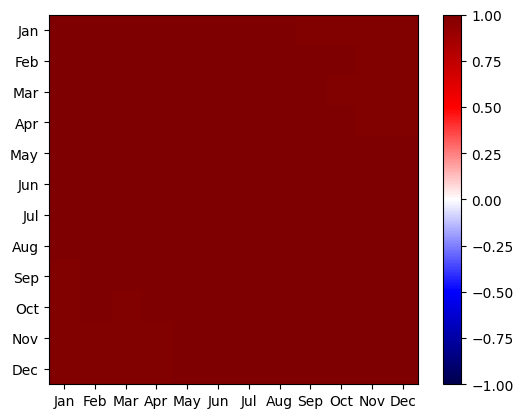

In [434]:
import matplotlib.pyplot as plt
plt.imshow(corr,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)

C:\Users\iksmr\AppData\Local\Temp\ipykernel_12556\3961161054.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_day_mean=bitcoin.groupby(level=[0,1]).mean()
C:\Users\iksmr\AppData\Local\Temp\ipykernel_12556\3961161054.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_day_mean=bitcoin.groupby(level=[0,1]).mean()


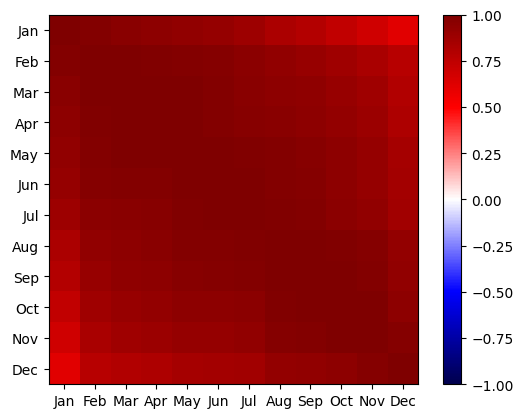

In [435]:
year_day_mean=bitcoin.groupby(level=[0,1]).mean()
tmpmn=year_day_mean['High']
mon_mean=tmpmn.unstack()
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
mon_mean.head()

corr=mon_mean.corr()
corr

year_day_mean=bitcoin.groupby(level=[0,1]).mean()
tmpmn=year_day_mean['High']
mon_mean=tmpmn.unstack()
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
mon_mean.head()

import matplotlib.pyplot as plt
plt.imshow(corr,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns);